<a href="https://colab.research.google.com/github/EladAriel/Tensorflow/blob/main/ag_news_subset_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AG News Subset - NLP

***Description***:

AG is a collection of more than 1 million news articles. News articles have been gathered from more than 2000 news sources by ComeToMyHead in more than 1 year of activity. ComeToMyHead is an academic news search engine which has been running since July, 2004. The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc), information retrieval (ranking, search, etc), xml, data compression, data streaming, and any other non-commercial activity.

***The Dataset***:

The AG's news topic classification dataset is constructed by choosing 4 largest classes from the original corpus. Each class contains 30,000 training samples and 1,900 testing samples. The total number of training samples is 120,000 and testing 7,600.


## Downloading and Preprocessing the Data

In [4]:
# Get TensorFlow datasets
import tensorflow as tf
import tensorflow_datasets as tfds

# List of available datasets
datasets_list = tfds.list_builders() # get all available datasets in TFDS
print("ag_news_subset" in datasets_list) # is the dataset we're after available?

True


### Load the Data

In [5]:
# Load in the data
(test_data, train_data), ds_info = tfds.load(name="ag_news_subset",                                           
                                             split=['test','train'],
                                             shuffle_files=True,
                                             as_supervised=False,
                                             with_info=True)

# Print information about the dataset
num_train = len(train_data)
num_test  = len(test_data)
num_examples = num_test + num_train
ds_feautres = ds_info.features
class_names = ds_info.features['label'].names
num_classes = ds_info.features['label'].num_classes

print(f'\nNumber of examples: {num_examples} \
        \nNumber of train examples: {num_train} \
        \nNumber of test examples: {num_test} \
        \n\nDataset features:\n{ds_feautres} \
        \n\nClass names: {class_names} \
        \nNumber of classes: {num_classes}')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/120000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/ag_news_subset/1.0.0.incomplete4U0X7O/ag_news_subset-train.tfrecord*...:   0%|…

Generating test examples...:   0%|          | 0/7600 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/ag_news_subset/1.0.0.incomplete4U0X7O/ag_news_subset-test.tfrecord*...:   0%| …

Dataset ag_news_subset downloaded and prepared to ~/tensorflow_datasets/ag_news_subset/1.0.0. Subsequent calls will reuse this data.

Number of examples: 127600         
Number of train examples: 120000         
Number of test examples: 7600         

Dataset features:
FeaturesDict({
    'description': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=4),
    'title': Text(shape=(), dtype=tf.string),
})         

Class names: ['World', 'Sports', 'Business', 'Sci/Tech']         
Number of classes: 4


### Exploring the Data

In [6]:
# Create train and test dataframes
train_df = tfds.as_dataframe(train_data, ds_info)
test_df = tfds.as_dataframe(test_data, ds_info)
train_df.head(15)

,description,label,title
0,b'AMD #39;s new dual-core Opteron chip is desi...,3,b'AMD Debuts Dual-Core Opteron Processor'
1,b'Reuters - Major League Baseball\\Monday anno...,1,"b""Wood's Suspension Upheld (Reuters)"""
2,b'President Bush #39;s quot;revenue-neutral q...,2,b'Bush reform may have blue states seeing red'
3,b'Britain will run out of leading scientists u...,3,"b""'Halt science decline in schools'"""
4,"b'London, England (Sports Network) - England m...",1,b'Gerrard leaves practice'
5,b'TOKYO - Sony Corp. is banking on the \\$3 bi...,0,b'Sony Banking on MGM Deal to Boost Profits'
6,b'Giant pandas may well prefer bamboo to lapto...,3,b'Giant pandas in China reserve get Wi-Fi'
7,"b'VILNIUS, Lithuania - Lithuania #39;s main pa...",0,b'Low turnout for Lithuania #39;s elections'
8,b'Witnesses in the trial of a US soldier charg...,0,b'Witness says CIA oversaw abuse at Abu Ghraib'
9,"b'Dan Olsen of Ponte Vedra Beach, Fla., shot a...",1,b'Dan Olsen leads PGA qualifying school'


In [7]:
# Distribution of labels in training data
train_df.label.value_counts()

3    30000
1    30000
2    30000
0    30000
Name: label, dtype: int64

### Get Lists of Sentences

In [8]:
# Convert text lines into lists 
train_sentences = train_df["description"].tolist()
test_sentences = test_df["description"].tolist()
len(train_sentences), len(test_sentences)

(120000, 7600)

### Make Numeric Labels

In [9]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["label"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["label"].to_numpy().reshape(-1, 1))

# Check what training labels look like
train_labels_one_hot

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

### Label Encode Labels

In [10]:
# Extract labels ("target" columns) and encode them into integers 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["label"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["label"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([3, 1, 2, ..., 0, 1, 2])

In [11]:
# Get class names and number of classes from LabelEncoder instance 
le_num_classes = len(label_encoder.classes_)
le_class_names = label_encoder.classes_
le_num_classes, le_class_names

(4, array([0, 1, 2, 3]))

## Model 0: Getting a Baseline

The baseline Model is TF-IDF Multinomial Naive Bayes

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline
model_0 = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(X=train_sentences, 
            y=train_labels_encoded);

In [13]:
# Evaluate baseline on validation dataset
model_0.score(X=test_sentences,
              y=test_labels_encoded)

0.8935526315789474

In [14]:
# Make predictions
baseline_preds = model_0.predict(test_sentences)
baseline_preds

array([1, 0, 3, ..., 3, 3, 1])

In [15]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-10-06 10:34:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-10-06 10:34:50 (75.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [16]:
# Import calculate_results helper function
from helper_functions import calculate_results

# Calculate baseline results
baseline_results = calculate_results(y_true=test_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 89.35526315789474,
 'precision': 0.8932360875902673,
 'recall': 0.8935526315789474,
 'f1': 0.8933027248726841}

## Preparing the Data for Deep Sequence Models

In [17]:
import numpy as np
from tensorflow.keras import layers

Since we'll be turning our sentences into numbers, it's a good idea to figure out how many words are in each sentence.

When our model goes through our sentences, it works best when they're all the same length (this is important for creating batches of the same size tensors).

In [18]:
# How long is each sentence on average?
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len # return average sentence length (in tokens)

31.062691666666666

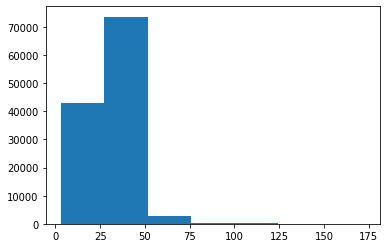

In [19]:
# What's the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7);

The vast majority of sentences are between 25 and 50 tokens in length.

In [20]:
# How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

45

It looks like 95% of the sentences in the training set have a length of 45 tokens or less.

In [21]:
# Maximum sentence length in the training set
max(sent_lens)

173

### Create Text Vectorizer

In [22]:
# How many words are in our vocabulary? (taken from 3.1 in https://arxiv.org/pdf/1509.01626.pdf)
max_tokens = 50000

In [23]:
# Create text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens, # number of words in vocabulary
                                    output_sequence_length=45) # desired output length of vectorized sequences

In [24]:
# Adapt text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [25]:
# Test out text vectorizer
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")

Text:
b'In what could be its final quarterly financial update before filing for Chapter 11, Delta Air Lines Inc. has reported a net loss of \\$646 million on \\$3.'

Length of text: 28

Vectorized text:
[[    6   152    82    31    14   204   507   311  1234   130  1548     9
   3646   369  1248   338   953    49    20   135     3   721   347     5
  23946    69     8   565     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0]]


In [26]:
# How many words in our training vocabulary?
ag_news_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(ag_news_text_vocab)}"), 
print(f"Most common words in the vocabulary: {ag_news_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {ag_news_text_vocab[-5:]}")

Number of words in vocabulary: 50000
Most common words in the vocabulary: ['', '[UNK]', 'the', 'a', 'to']
Least common words in the vocabulary: ['wedgeshape', 'wedges', 'wedged', 'wedemen', 'wedeman']


In [27]:
# Get the config of our text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 50000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 45,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

### Create Custom Text Embedding

In [28]:
# Create token embedding layer
token_embed = layers.Embedding(input_dim=len(ag_news_text_vocab), # length of vocabulary
                               output_dim=128,
                               # Use masking to handle variable sequence lengths (save space)
                               mask_zero=True,
                               name="token_embedding") 

# Show example embedding
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
b'In what could be its final quarterly financial update before filing for Chapter 11, Delta Air Lines Inc. has reported a net loss of \\$646 million on \\$3.'

Sentence after vectorization (before embedding):
[[    6   152    82    31    14   204   507   311  1234   130  1548     9
   3646   369  1248   338   953    49    20   135     3   721   347     5
  23946    69     8   565     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0]]

Sentence after embedding:
[[[ 0.02853738 -0.00311396 -0.0308654  ...  0.01000379 -0.01995809
   -0.01421499]
  [ 0.03594368  0.03000239  0.03309666 ... -0.01125965  0.03087355
    0.00428102]
  [-0.0261411  -0.03727501 -0.04155167 ... -0.04653752 -0.0273716
    0.02272021]
  ...
  [-0.02645917 -0.02574787  0.03699409 ... -0.02454921 -0.02620366
   -0.01012743]
  [-0.02645917 -0.02574787  0.03699409 ... -0.02454921 -0.02620366
   -0.01012743]
  [-0.02645917 -0.02574787  0.036

### Create Datasets

In [29]:
# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# See how the train dataset looks like
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 4), dtype=tf.float64, name=None))>

## Model 1: Conv1D with Token Embeddings

In [27]:
# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [28]:
# Get summary of Conv1D model
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 45)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 45, 128)          6400000   
                                                                 
 conv1d (Conv1D)             (None, 45, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 4)                 260   

In [29]:
# Fit the model
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=3,
                              validation_data=test_dataset,
                              validation_steps=int(0.1 * len(test_dataset))) # only validate on 10% of batches

Epoch 1/3
375/375 [==============================] - 15s 8ms/step - loss: 0.6638 - accuracy: 0.7678 - val_loss: 0.3823 - val_accuracy: 0.8764
Epoch 2/3
375/375 [==============================] - 3s 7ms/step - loss: 0.3397 - accuracy: 0.8875 - val_loss: 0.3405 - val_accuracy: 0.8859
Epoch 3/3
375/375 [==============================] - 3s 7ms/step - loss: 0.3251 - accuracy: 0.8946 - val_loss: 0.3265 - val_accuracy: 0.8832


In [30]:
# Evaluate on whole test dataset
model_1.evaluate(test_dataset)

238/238 [==============================] - 1s 4ms/step - loss: 0.3217 - accuracy: 0.8949


[0.32166141271591187, 0.8948684334754944]

In [31]:
# Make predictions
model_1_pred_probs = model_1.predict(test_dataset)

# Convert pred probs to classes
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)

# Calculate model_1 results
model_1_results = calculate_results(y_true=test_labels_encoded,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 89.48684210526315,
 'precision': 0.8949091914089312,
 'recall': 0.8948684210526315,
 'f1': 0.8946190580922329}

## Model 2: Feature Extraction with Pretrained Token Embeddings

In [31]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [32]:
# Test out the embedding on a random sentence
random_training_sentence = random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
b'Reuters - The U.S. Food and Drug Administration\\expects to inspect Boston Scientific Corp.\'s Galway, Ireland\\factory in the "near future" as part of its probe into the\\company\'s coronary stent recall, the Wall Street Journal said\\on Friday.'

Sentence after embedding:
[-0.01615827  0.04442331 -0.02476357 -0.03515388 -0.04481756 -0.06294613
 -0.06100817  0.00525378  0.00120031 -0.06536901  0.04851687  0.00047003
 -0.06548622 -0.06176395 -0.0447396   0.01442109 -0.07293514  0.04549493
  0.01751781  0.06022148 -0.01185173 -0.00403951  0.02120942 -0.03950191
 -0.00460863  0.05398167 -0.06800391  0.07075007 -0.03675275 -0.01036607] (truncated output)...

Length of sentence embedding:
512


### Building & Fitting an NLP Feature Extraction Model from TensorFlow Hub

In [34]:
# Define feature extractor model using TF Hub layer
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text and create embedding
x = layers.Dense(128, activation="relu")(pretrained_embedding) # add a fully connected layer on top of the embedding
outputs = layers.Dense(num_classes, activation="softmax")(x) # create the output layer
model_2 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_2")

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [35]:
# Get a summary of the model
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 256,864,004
Trainable params: 66,180
Non-trainable params: 256,797,824
_________________________________________________________________


In [36]:
# Fit feature extractor model for 3 epochs
model_2_history =model_2.fit(train_dataset,
                             steps_per_epoch=int(0.1 * len(train_dataset)),
                             epochs=3,
                             validation_data=test_dataset,
                             validation_steps=int(0.1 * len(test_dataset)))

Epoch 1/3
375/375 [==============================] - 7s 13ms/step - loss: 0.5029 - accuracy: 0.8566 - val_loss: 0.3597 - val_accuracy: 0.8764
Epoch 2/3
375/375 [==============================] - 4s 12ms/step - loss: 0.3368 - accuracy: 0.8812 - val_loss: 0.3380 - val_accuracy: 0.8818
Epoch 3/3
375/375 [==============================] - 4s 12ms/step - loss: 0.3288 - accuracy: 0.8862 - val_loss: 0.3269 - val_accuracy: 0.8832


In [37]:
# Evaluate on whole test dataset
model_2.evaluate(test_dataset)

238/238 [==============================] - 3s 11ms/step - loss: 0.3480 - accuracy: 0.8791


[0.34802165627479553, 0.8790789246559143]

In [38]:
# Make predictions
model_2_pred_probs = model_2.predict(test_dataset)

# Convert pred probs to classes
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)

# Calculate model_1 results
model_2_results = calculate_results(y_true=test_labels_encoded,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 87.90789473684211,
 'precision': 0.878689005908294,
 'recall': 0.8790789473684211,
 'f1': 0.878802648257098}

## Model 3: Conv1D with Character Embeddings

### Creating a Character-Level Tokenizer

In [33]:
# Make function to split sentences into characters
def split_chars(text):
  return " ".join(list(str(text)))

# Test splitting non-character-level sequence into characters
split_chars(random_training_sentence)

'b \' R e u t e r s   -   T h e   U . S .   F o o d   a n d   D r u g   A d m i n i s t r a t i o n \\ \\ e x p e c t s   t o   i n s p e c t   B o s t o n   S c i e n t i f i c   C o r p . \\ \' s   G a l w a y ,   I r e l a n d \\ \\ f a c t o r y   i n   t h e   " n e a r   f u t u r e "   a s   p a r t   o f   i t s   p r o b e   i n t o   t h e \\ \\ c o m p a n y \\ \' s   c o r o n a r y   s t e n t   r e c a l l ,   t h e   W a l l   S t r e e t   J o u r n a l   s a i d \\ \\ o n   F r i d a y . \''

In [34]:
# Split sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])

b ' A M D   # 3 9 ; s   n e w   d u a l - c o r e   O p t e r o n   c h i p   i s   d e s i g n e d   m a i n l y   f o r   c o r p o r a t e   c o m p u t i n g   a p p l i c a t i o n s ,   i n c l u d i n g   d a t a b a s e s ,   W e b   s e r v i c e s ,   a n d   f i n a n c i a l   t r a n s a c t i o n s . '


In [35]:
# What's the average character length?
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

193.40201666666667

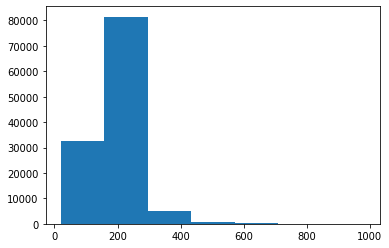

In [36]:
# Check the distribution of our sequences at character-level
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

 Most of our sequences are between 200 and 300 characters long.

In [37]:
# Find what character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

297

It looks like 95% of the sentences in the training set have a length of 297 tokens or less.

In [38]:
# Get all keyboard characters for char-level embedding
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # num characters in alphabet + space + OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,  
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)

In [40]:
# Check character vocabulary characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 38
5 most common characters: ['', '[UNK]', 'e', 'a', 't']
5 least common characters: ['5', '4', '6', '7', '8']


In [41]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
b ' I n t e l   i s   b u i l d i n g   a   S y m b i a n - b a s e d   m o b i l e   p h o n e ,   b a s e d   o n   N o k i a   # 3 9 ; s   S e r i e s   6 0   u s e r   i n t e r f a c e .   T h e   c o m p a n y   h a s   n o t   a n n o u n c e d   a   d e l i v e r y   d a t e ,   b u t   a   r e f e r e n c e   p l a t f o r m   s h o u l d   a r r i v e   s o m e t i m e   i n   2 0 0 5 ,   i n t e n d e d   t o   '

Length of chars: 180

Vectorized chars:
[[19  5  6  4  2 10  5  8 19 14  5 10 12  5  6 18  3  8 20 15 19  5  3  6
  19  3  8  2 12 15  7 19  5 10  2 16 11  7  6  2 19  3  8  2 12  7  6  6
   7 23  5  3 25 29  8  8  2  9  5  2  8 35 24 14  8  2  9  5  6  4  2  9
  17  3 13  2  4 11  2 13  7 15 16  3  6 20 11  3  8  6  7  4  3  6  6  7
  14  6 13  2 12  3 12  2 10  5 22  2  9 20 12  3  4  2 19 14  4  3  9  2
  17  2  9  2  6 13  2 16 10  3  4 17  7  9 15  8 11  7 14 10 12  3  9  9
   5 22  2  8  7 15  2  4  5 15  2  5  6 31 24 24 33  5  6  4  2  6 12 

### Creating a Character-Level Embedding

In [42]:
# Create char embedding layer
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # number of different characters
                              output_dim=300, # embedding dimension of each character (taken from 3.1 in https://arxiv.org/pdf/1509.01626.pdf)
                              mask_zero=False, # don't use masks (this messes up model_5 if set to True)
                              name="char_embed")

# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
b ' I n t e l   i s   b u i l d i n g   a   S y m b i a n - b a s e d   m o b i l e   p h o n e ,   b a s e d   o n   N o k i a   # 3 9 ; s   S e r i e s   6 0   u s e r   i n t e r f a c e .   T h e   c o m p a n y   h a s   n o t   a n n o u n c e d   a   d e l i v e r y   d a t e ,   b u t   a   r e f e r e n c e   p l a t f o r m   s h o u l d   a r r i v e   s o m e t i m e   i n   2 0 0 5 ,   i n t e n d e d   t o   '

Embedded chars (after vectorization and embedding):
[[[ 0.0239736   0.04331949 -0.00266689 ...  0.01986642  0.00728518
    0.03033737]
  [-0.00192012 -0.04153515  0.034726   ... -0.01730035 -0.03694614
    0.03586223]
  [-0.0268013  -0.00050445 -0.04752487 ...  0.00524881 -0.00109105
   -0.02651626]
  ...
  [ 0.03375058  0.03504491  0.00573681 ... -0.02759936  0.04847786
    0.02577766]
  [ 0.03375058  0.03504491  0.00573681 ... -0.02759936  0.04847786
    0.02577766]
  [ 0.03375058  0.03504491  0.00573681 ... -0

### Building a Conv1D Model to Fit on Character Embeddings

In [49]:
# Make Conv1D on chars only
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [50]:
# Check the summary of conv1d_char_model
model_3.summary()

Model: "model_3_conv1D_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 297)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 297, 300)          21000     
                                                                 
 conv1d_1 (Conv1D)           (None, 297, 64)           96064     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 4

In [43]:
# Create char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 4), dtype=tf.float64, name=None))>

In [52]:
# Fit the model on chars only
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=3,
                              validation_data=test_char_dataset,
                              validation_steps=int(0.1 * len(test_char_dataset)))

Epoch 1/3
375/375 [==============================] - 4s 7ms/step - loss: 1.0298 - accuracy: 0.5889 - val_loss: 0.7489 - val_accuracy: 0.7092
Epoch 2/3
375/375 [==============================] - 3s 8ms/step - loss: 0.7062 - accuracy: 0.7286 - val_loss: 0.6747 - val_accuracy: 0.7554
Epoch 3/3
375/375 [==============================] - 3s 7ms/step - loss: 0.6485 - accuracy: 0.7580 - val_loss: 0.6065 - val_accuracy: 0.7812


In [53]:
# Evaluate model_3 on whole test char dataset
model_3.evaluate(test_char_dataset)

238/238 [==============================] - 1s 5ms/step - loss: 0.6308 - accuracy: 0.7668


[0.630816638469696, 0.7668421268463135]

In [54]:
# Make predictions
model_3_pred_probs = model_3.predict(test_char_dataset)

# Convert pred probs to classes
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)

# Calculate model_1 results
model_3_results = calculate_results(y_true=test_labels_encoded,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 76.6842105263158,
 'precision': 0.7798594367435955,
 'recall': 0.7668421052631579,
 'f1': 0.7682686129218886}

## Model 4: Combining Pretrained Token Embeddings + Character Embeddings (Hybrid Embedding Layer)

In [55]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(300))(char_embeddings) # LSTM shown in Figure 2 of https://arxiv.org/pdf/1509.01626.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output, 
                                                                  char_model.output])

# 4. Create output layers - addition of dropout
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

In [56]:
# Get summary of token and character model
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 297)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   [

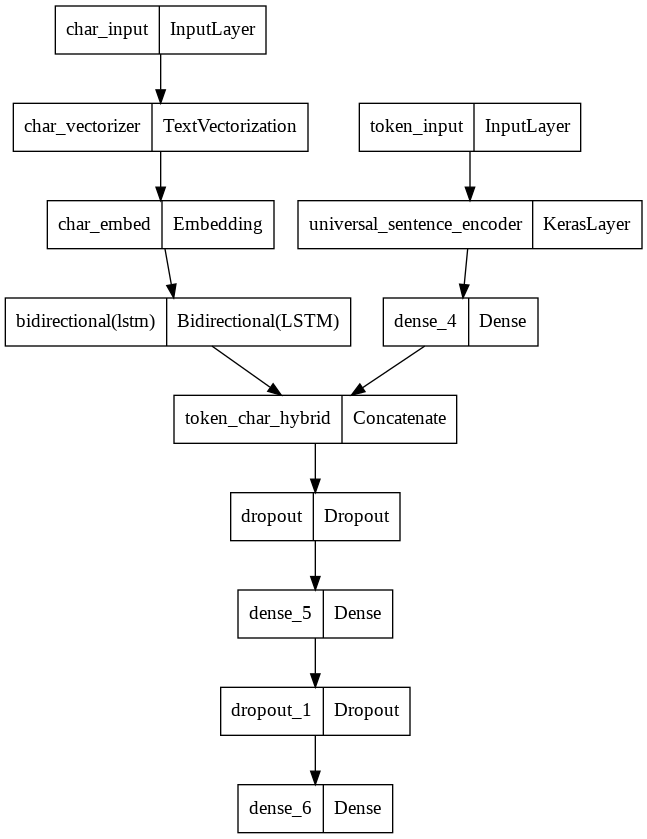

In [57]:
# Plot hybrid token and character model
from tensorflow.keras.utils import plot_model
plot_model(model_4)

In [58]:
# Compile token char model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### Combining Token and Character Data into a `tf.data` Dataset

In [59]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

# Repeat same steps validation data
test_char_token_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_dataset = tf.data.Dataset.zip((test_char_token_data, test_char_token_labels))
test_char_token_dataset = test_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Check out training char and token embedding dataset
train_char_token_dataset, test_char_token_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 4), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 4), dtype=tf.float64, name=None))>)

### Fitting a Model on Token and Character-Level Sequences

In [60]:
# Fit the model on tokens and chars
model_4_history = model_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=test_char_token_dataset,
                              validation_steps=int(0.1 * len(test_char_token_dataset)))

Epoch 1/3
375/375 [==============================] - 26s 58ms/step - loss: 0.5538 - accuracy: 0.7947 - val_loss: 0.3521 - val_accuracy: 0.8764
Epoch 2/3
375/375 [==============================] - 21s 56ms/step - loss: 0.3631 - accuracy: 0.8742 - val_loss: 0.3248 - val_accuracy: 0.8859
Epoch 3/3
375/375 [==============================] - 21s 56ms/step - loss: 0.3495 - accuracy: 0.8798 - val_loss: 0.3250 - val_accuracy: 0.8845


In [61]:
# Evaluate on the whole validation dataset
model_4.evaluate(test_char_token_dataset)

238/238 [==============================] - 6s 25ms/step - loss: 0.3412 - accuracy: 0.8803


[0.341243177652359, 0.8802631497383118]

In [62]:
# Make predictions
model_4_pred_probs = model_4.predict(test_char_token_dataset)

# Convert pred probs to classes
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)

# Calculate model_1 results
model_4_results = calculate_results(y_true=test_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 88.02631578947368,
 'precision': 0.8805701200498123,
 'recall': 0.8802631578947369,
 'f1': 0.8799180405864138}

## Model 5: Feature Extraction with Pretrained GloVe Embeddings

In [63]:
# Loading the pre-trained embeddings 
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-10-06 07:43:01--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-10-06 07:43:01--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-10-06 07:43:02--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [64]:
# Getting the path of the glove embedding (using 100D)
import numpy as np 
glove_path = 'glove.6B.100d.txt'

embedding_index = {}

# Making dict of vector representtion of the words (s --> [8, 48......])
with open(glove_path) as f:
  for line in f:
    
    # Getting the words and coef in a variable 
    word , coefs = line.split(maxsplit = 1)
    coefs = np.fromstring(coefs , 'f' , sep = ' ')
    
    # Adding the coefs to our embedding dict 
    embedding_index[word] = coefs

print(f'Found {len(embedding_index)} word vectors')

Found 400000 word vectors


In [65]:
# Getting the dict mapping word --> index 
word_index_text = dict(zip(ag_news_text_vocab , range(len(ag_news_text_vocab))))

In [66]:
# Creating a function that will give us a embedding matrix 
def get_glove_embedding_matrix(num_tokens , embedding_dim , word_index):

  # Defining the hits and misses here 
  hits , misses = 0 , 0

  # Prepare the embedding matrix 
  embedding_matrix = np.zeros((num_tokens , embedding_dim ))
  for word , i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector 
      hits += 1 
    else:
      misses += 1 

  return embedding_matrix , hits , misses

In [67]:
# Using the above function to get the embedding matrix 
num_tokens_text = len(ag_news_text_vocab) + 2 
embedding_dim = 100
sentence_embedding_matrix , hits_ , misses_ = get_glove_embedding_matrix(num_tokens_text , embedding_dim, word_index_text)

print(f'Hits: {hits_} and Misses: {misses_} for the sentence embedding matrix')

Hits: 38662 and Misses: 11338 for the sentence embedding matrix


In [68]:
# Adding the embedding matrix to our Embedding layer (Sentence and characters)
from tensorflow.keras.layers import Embedding

sen_embedding_layer = Embedding(num_tokens_text , 
                                embedding_dim , 
                                embeddings_initializer = tf.keras.initializers.Constant(sentence_embedding_matrix) , 
                                trainable = False )

In [69]:
# Creating the datasets for our both sentences and chars  
train_sen_vectors = text_vectorizer(np.array([[sen] for sen in train_sentences])).numpy()
test_sen_vectors = text_vectorizer(np.array([[sen] for sen in test_sentences])).numpy()

# Training and validation dataset 
train_ds = tf.data.Dataset.from_tensor_slices((train_sen_vectors , train_labels_encoded))
test_ds = tf.data.Dataset.from_tensor_slices((test_sen_vectors , test_labels_encoded))


# Applying the batch size and prefetching (performance optimization )
train_ds = train_ds.batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)


train_ds,  test_ds

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 45), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 45), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [70]:
train_sen_vectors[0].shape

(45,)

In [71]:
# Sample 
input = layers.Input(shape = (None,) , dtype = 'int64')
glove_emb = sen_embedding_layer(input)
#sample_emb = embedding_layer(sample_tokens)
x = layers.Conv1D(128 , 5 , activation= 'relu' , padding = 'same')(glove_emb)
x = layers.MaxPooling1D(5, padding = 'same')(x)
x = layers.Conv1D(128, 5, activation="relu" , padding = 'same')(x)
x = layers.MaxPooling1D(5 , padding ='same')(x)
x = layers.Conv1D(128, 5, activation="relu" , padding = 'same')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(len(class_names) , activation= 'softmax')(x)

glove_model = tf.keras.Model(input , output, name="Glove_model")
glove_model.summary()

Model: "Glove_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 100)         5000200   
                                                                 
 conv1d_2 (Conv1D)           (None, None, 128)         64128     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 128)        0         
 )                                                               
                                                                 
 conv1d_3 (Conv1D)           (None, None, 128)         82048     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 128)        0         
 1D)                                                   

In [72]:
# Compiling and fitting the model
glove_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
                     optimizer = tf.keras.optimizers.Adam(), 
                     metrics = ['accuracy'])

In [73]:
# Fit the model on chars only
model_5_history = glove_model.fit(train_ds,
                                  steps_per_epoch=int(0.1 * len(train_ds)),
                                  epochs=3,
                                  validation_data=test_ds,
                                  validation_steps=int(0.1 * len(test_ds)))

Epoch 1/3
375/375 [==============================] - 3s 4ms/step - loss: 0.5360 - accuracy: 0.8066 - val_loss: 0.3686 - val_accuracy: 0.8818
Epoch 2/3
375/375 [==============================] - 2s 4ms/step - loss: 0.3710 - accuracy: 0.8771 - val_loss: 0.3487 - val_accuracy: 0.8927
Epoch 3/3
375/375 [==============================] - 2s 4ms/step - loss: 0.3547 - accuracy: 0.8835 - val_loss: 0.3408 - val_accuracy: 0.8804


In [74]:
# Evaluate model_5 on whole test dataset
glove_model.evaluate(test_ds)

238/238 [==============================] - 1s 3ms/step - loss: 0.3351 - accuracy: 0.8820


[0.3351196348667145, 0.8819736838340759]

In [75]:
# Make predictions
model_5_pred_probs = glove_model.predict(test_ds)

# Convert pred probs to classes
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)

# Calculate model_1 results
model_5_results = calculate_results(y_true=test_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 88.19736842105263,
 'precision': 0.8843683743481657,
 'recall': 0.8819736842105264,
 'f1': 0.8822751111742015}

## Compare Model Results

In [77]:
# Combine model results into a DataFrame
import pandas as pd
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "pretrained_glove_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,89.355263,0.893236,0.893553,0.893303
custom_token_embed_conv1d,89.486842,0.894909,0.894868,0.894619
pretrained_token_embed,87.907895,0.878689,0.879079,0.878803
custom_char_embed_conv1d,76.684211,0.779859,0.766842,0.768269
hybrid_char_token_embed,88.026316,0.880570,0.880263,0.879918
pretrained_glove_embed,88.197368,0.884368,0.881974,0.882275


In [78]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

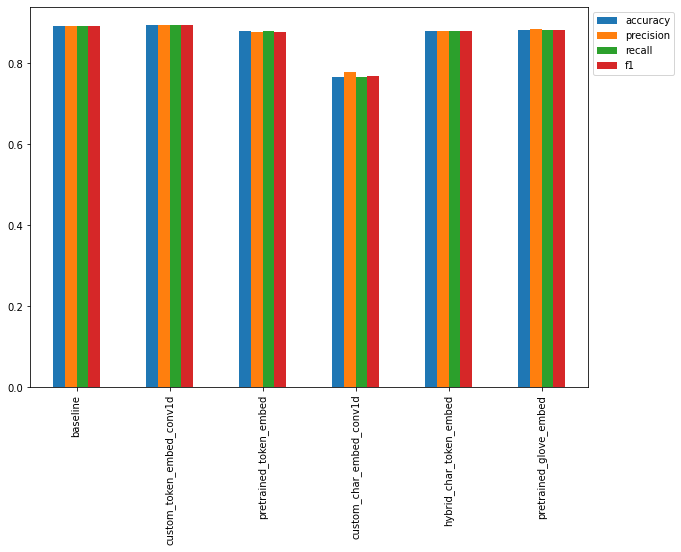

In [79]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

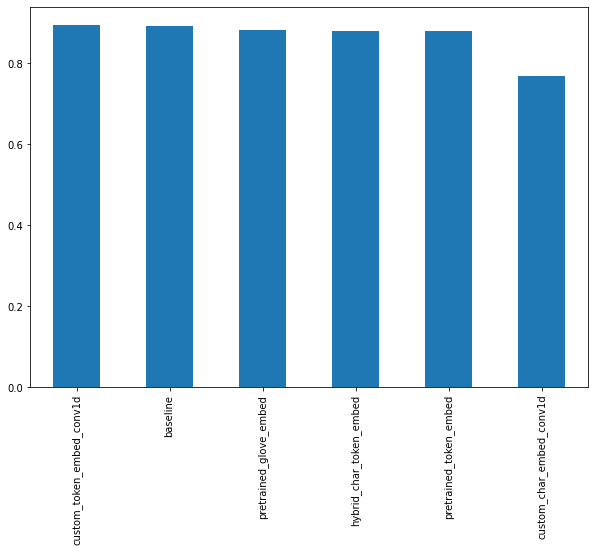

In [80]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

Based on F1-scores, it looks like the Conv1D with Token Embeddings model performing better than all of the other models. Note that the baseline's F1-score isn't too far off the Conv1D with Token Embeddings model.

## Model 6: Best Performing Model Trained on the Full Training Data

In [44]:
# Make Conv1D on chars only
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3_all_data = tf.keras.Model(inputs=inputs,
                                  outputs=outputs,
                                  name="model_3_conv1D_char_embedding_all_data")

# Compile model
model_3_all_data.compile(loss="categorical_crossentropy",
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["accuracy"])

In [45]:
# Fit the model on chars only
model_3_history_all_data = model_3_all_data.fit(train_char_dataset,
                                                steps_per_epoch=len(train_char_dataset),
                                                epochs=3,
                                                validation_data=test_char_dataset,
                                                validation_steps=len(test_char_dataset))

Epoch 1/3
3750/3750 [==============================] - 34s 7ms/step - loss: 0.6374 - accuracy: 0.7624 - val_loss: 0.5555 - val_accuracy: 0.8029
Epoch 2/3
3750/3750 [==============================] - 24s 6ms/step - loss: 0.5138 - accuracy: 0.8135 - val_loss: 0.5196 - val_accuracy: 0.8192
Epoch 3/3
3750/3750 [==============================] - 24s 6ms/step - loss: 0.4855 - accuracy: 0.8239 - val_loss: 0.5047 - val_accuracy: 0.8236


In [46]:
# Evaluate model_3 on whole test char dataset
model_3_all_data.evaluate(test_char_dataset)

238/238 [==============================] - 1s 4ms/step - loss: 0.5047 - accuracy: 0.8236


[0.5047363042831421, 0.8235526084899902]

In [47]:
# Make predictions
model_3_pred_probs_all_data = model_3_all_data.predict(test_char_dataset)

# Convert pred probs to classes
model_3_preds_all_data = tf.argmax(model_3_pred_probs_all_data, axis=1)

# Calculate model_1 results
model_3_results_all_data = calculate_results(y_true=test_labels_encoded,
                                             y_pred=model_3_preds_all_data)
model_3_results_all_data

{'accuracy': 82.35526315789473,
 'precision': 0.8261065338242004,
 'recall': 0.8235526315789473,
 'f1': 0.8239485695959733}

## Saving and Loading a Trained Model

In [48]:
# Save model to drive so it can be used later 
model_3_all_data.save("drive/My Drive/Colab Notebooks/Conv1D_char_embd_model")

In [49]:
# Load in from Google Drive
model_3_all_data_loaded = tf.keras.models.load_model('drive/My Drive/Colab Notebooks/Conv1D_char_embd_model')

## Finding the Most Wrong Examples

In [51]:
%%time
# Get list of class names of test predictions
test_pred_classes = [label_encoder.classes_[pred] for pred in model_3_preds_all_data]
test_pred_classes[:10]

CPU times: user 3.28 s, sys: 157 ms, total: 3.43 s
Wall time: 3.3 s


[1, 0, 3, 1, 0, 3, 1, 1, 0, 2]

In [54]:
# Create prediction-enriched test dataframe
test_df["prediction"] = test_pred_classes # create column with test prediction class names
test_df["pred_prob"] = tf.reduce_max(model_3_pred_probs_all_data, axis=1).numpy() # get the maximum prediction probability
test_df["correct"] = test_df["prediction"] == test_df["label"] # create binary column for whether the prediction is right or not
test_df.head(20)

,description,label,title,prediction,pred_prob,correct
0,"b' CHARLOTTE, N.C. (Sports Network) - Carolina...",1,"b""Carolina's Davis Done for the Season""",1,0.974901,True
1,"b' PRESENTACION, Philippines (Reuters) - Phili...",0,"b'Philippine Rebels Free Troops, Talks in Doubt'",0,0.705642,True
2,"b'SAN FRANCISCO, CA - November 30, 2004 -Ubiso...",3,b'New Rainbow Six Franchise for Spring 2005',3,0.982141,True
3,b'DANIEL VETTORI spun New Zealand to the brink...,1,b'Kiwis heading for big win',1,0.982900,True
4,"b""AFP - Georgian and South Ossetian forces ove...",0,"b'Shelling, shooting resumes in breakaway Geor...",0,0.992844,True
5,b'Hewlett-Packard has signed a deal to sell ne...,3,b'HP signs on high-speed networking start-up',3,0.787958,True
6,b'Annika Sorenstam could only manage a level-p...,1,b'Sorenstam maintains Florida lead',1,0.988500,True
7,b'AP - Maria Sharapova withdrew from her semif...,1,b'Sharapova Withdraws From Advanta Tourney (AP)',1,0.994510,True
8,b'The governments of Serbia and the Bosnian Se...,0,"b'Serbia, Bosnian Serbs Fail to Help War Crime...",0,0.982444,True
9,b'The nation #39;s two largest automakers on W...,2,"b'Ford, GM report slow November sales'",2,0.691516,True


In [55]:
# Find top 100 most wrong samples
top_100_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:100]
top_100_wrong

,description,label,title,prediction,pred_prob,correct
7368,"b""Southern California took the top spot Monday...",0,"b'USC, Miami Top BCS Standings, Not Okla.'",1,0.999713,False
874,b'No ticket matched all four numbers and the M...,2,b'No ticket matched all four numbers and the M...,1,0.999328,False
2821,b'Vodafone launches its third-generation servi...,2,b'Vodafone begins 3G service',3,0.999211,False
4489,"b'Ruben Magnano, who coached Argentina to the ...",0,b'Argentina Basketball Coach Magnano Quits',1,0.999171,False
736,b'Argentina defeated the United States team of...,0,"b""Argentina Beats U.S. Men's Basketball Team""",1,0.998989,False
...,...,...,...,...,...,...
7206,b'In a move that has been dubbed as #39;disas...,3,b'Exeter uni cans chemistry department',1,0.945634,False
2099,"b""AFP - Organisers were left banking on the Du...",0,b'Rain threatens triangular final (AFP)',1,0.945534,False
755,b'I change the mutual funds in my 401(k) plan ...,2,b'Time to look overseas for a healthier 401(k) ',1,0.945414,False
7086,b'The legal battle between UK phone manufactur...,2,b'Microsoft vs Sendo: It #39;s over',3,0.944936,False


In [59]:
# Investigate top wrong preds
for row in top_100_wrong[0:10].itertuples(): # adjust indexes to view different samples
  _, text, target, _, pred, prob, _ = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9997132420539856
Text:
b"Southern California took the top spot Monday in the season's first Bowl Championship Series standings, and surprisingly Miami is ahead of Oklahoma in a close race for the second spot.    Oklahoma is No..."

----

Target: 2, Pred: 1, Prob: 0.9993276596069336
Text:
b'No ticket matched all four numbers and the MegaBall in Friday #39;s Mega Money drawing of the Florida Lottery. The numbers drawn were 10-18-19-22; the Megaball was 6. Twelve tickets matched four of the numbers '

----

Target: 2, Pred: 3, Prob: 0.9992109537124634
Text:
b'Vodafone launches its third-generation services for mobile phones, offering video calls, music downloads and games.'

----

Target: 0, Pred: 1, Prob: 0.9991708993911743
Text:
b'Ruben Magnano, who coached Argentina to the Olympic basketball gold medal in Athens, resigned Thursday to accept a coaching job in Italy.'

----

Target: 0, Pred: 1, Prob: 0.9989890456199646
Text:
b'Argentina defeated the United Sta